<a href="https://colab.research.google.com/github/igsamoshoke/Project--Analysing-The-Movie-Database-TMDb--Dataset1/blob/main/Project_1_Igonor_Sam_Oshoke_Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Analysing The Movie Database(TMDb) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This is a Dataset from the Movie Database. In this analysis, I will be using this data set to find trends between movie genres, the cast, budget and revenue and use this trends to answer quesions such as the kind of genres capable of bringing in the highest and lowest revenues, what amount of budget is required to increase our chances of generating higher revenue, and what genres are highly watched by viewers.


> Dataset Used: TMDb movie data- Provided by Udacity from Kaggle. Link here: https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000 




Questions Asked and Answered:


1.   Which genres are the most popular
2.   what is the average budget of all movies
3. what is the average runtime of all movies
4. which movies generated the highest and lowest revenues and how do they rate
5. what is the avarage budget needed to generate revenue of over 50million dollars
6. what is the average revenue generated by the movies that made over 50million dollars
7. what is the average runtime of the movies that made over 50million dollars



#####Firstly, I import all my packeges

* pandas
* numpy
* seaborn
* matplotlib






In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [ ]:
#Load in the Dataset
df_movies= pd.read_csv('tmdb-movies.csv')
# Display the head of the dataset for quick glance
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In the Dataset Above, I have some (not all columns are listed here) colums which show the following:



*   id= Movie ID
*   popularity= popularity Rating of the movie
*   budget= budget of the movie
*   revenue= revenue generated by the movie
*   original_title= original title of the movie
*   director= director of the movie
*   production_companies= Production Companies of the movie
*   genres= genres of the movie
*   vote_count= number of ratings
*   vote_average= average of ratings
*   release_year = year the movie was released


### Data Cleaning

In [ ]:
# get the shape of the dataset
df_movies.shape

(10866, 21)

In [ ]:
# get a description of the dataset
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I checked for a description of the dataset so i can know the mean, percentiles, Maximum values and other related stats

In [ ]:
# get information about the dataset
df_movies.info() 
# After this, I can see the number of rows with missing values and the datatypes in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

After initial evaluation,
I have 10866 rows and 21 columns in this dataset.

The columns with missing values are

*   imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production companies.

In [ ]:
#Next I check for rows that are duplicated
print(sum(df_movies.duplicated()))

1


There is 1 duplicated row as seen above


In [ ]:
#Then i start cleaning the dataset to make it into what I need
#First, I drop the duplicated row
df_movies.drop_duplicates(inplace=True)

#Then i confrim the number of duplicated rows again to make sure it 0
sum(df_movies.duplicated()) 

0

> In the cell above i removed all duplicated rows.

In [ ]:
#Next, I remove the columns that I dont need for my analysis
df_movies.drop([ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies'], axis=1, inplace=True)

I removed columns that would not be useful for the questions I want to answer and therefore will not be useful for my analysis

In [ ]:
#confirm the changes have been made
df_movies.head(200)

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
195,0,8413144,Amy,Amy Winehouse|Mark Ronson|Tony Bennett|Pete Do...,128,Documentary|Music,7/3/15,345,7.5,2015
196,0,0,Madame Bovary,Mia Wasikowska|Ezra Miller|Laura Carmichael|He...,118,Drama,6/4/15,52,5.3,2015
197,0,0,The Hallow,Joseph Mawle|Bojana NovakoviÄ‡|Michael McElhat...,97,Fantasy|Horror,11/6/15,122,4.9,2015
198,0,0,Barbie in Princess Power,Britt Irvin|Michael Kopsa|Kelly Sheridan,74,Family|Animation,1/29/15,13,5.5,2015


**I noticed that in the budget and revenue colum, there are some values that are 0 which is impossible so I have to remove them. **

In [ ]:
# Columns that I have identified to be cleaned.
ccols = ['budget', 'revenue']
# then i replave the values that are 0 with no values so they can be dropped
df_movies[ccols] = df_movies[ccols].replace(0, np.NaN)

In [ ]:
#check for mssing values in these columns
df_movies.isnull().sum()

budget            5696
revenue           6016
original_title       0
cast                76
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

**I checked for columns with missing values **

In [ ]:
# then i drop the rows that contains missing values
df_movies.dropna(inplace=True)


In [ ]:
#then i confirm again
print(df_movies.isnull().sum())

budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64


In [ ]:
# I noticed that the release date of the movies are not in the right datatype- they shouldnt be integers
# so i have to convert them into datetime format with hyphen
df_movies.release_date = pd.to_datetime(df_movies['release_date'])

In [ ]:
#then i confirm the changes
df_movies.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


> I converted the release date column to datetime format because its in a wrong format as i noticed earlier when i checked the info of the dataset

In [ ]:
#confir that the changed are made and correct
df_movies.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

### **At this stage, I have**
>    '
1.   removed duplicated rows
2.   dropped columns I dont need
3. removed all 0 values that shouldnt be there 
4. dropped all rows with missing values
5. confirmed that all my changed have been made to the data set correctly.
6. ensured that all my datatypes are correct


In [ ]:
#save the cleand dataset for later
df_movies.to_csv('cleaned_imdbmovies_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis
### scatterplots for the table for overview of relationships

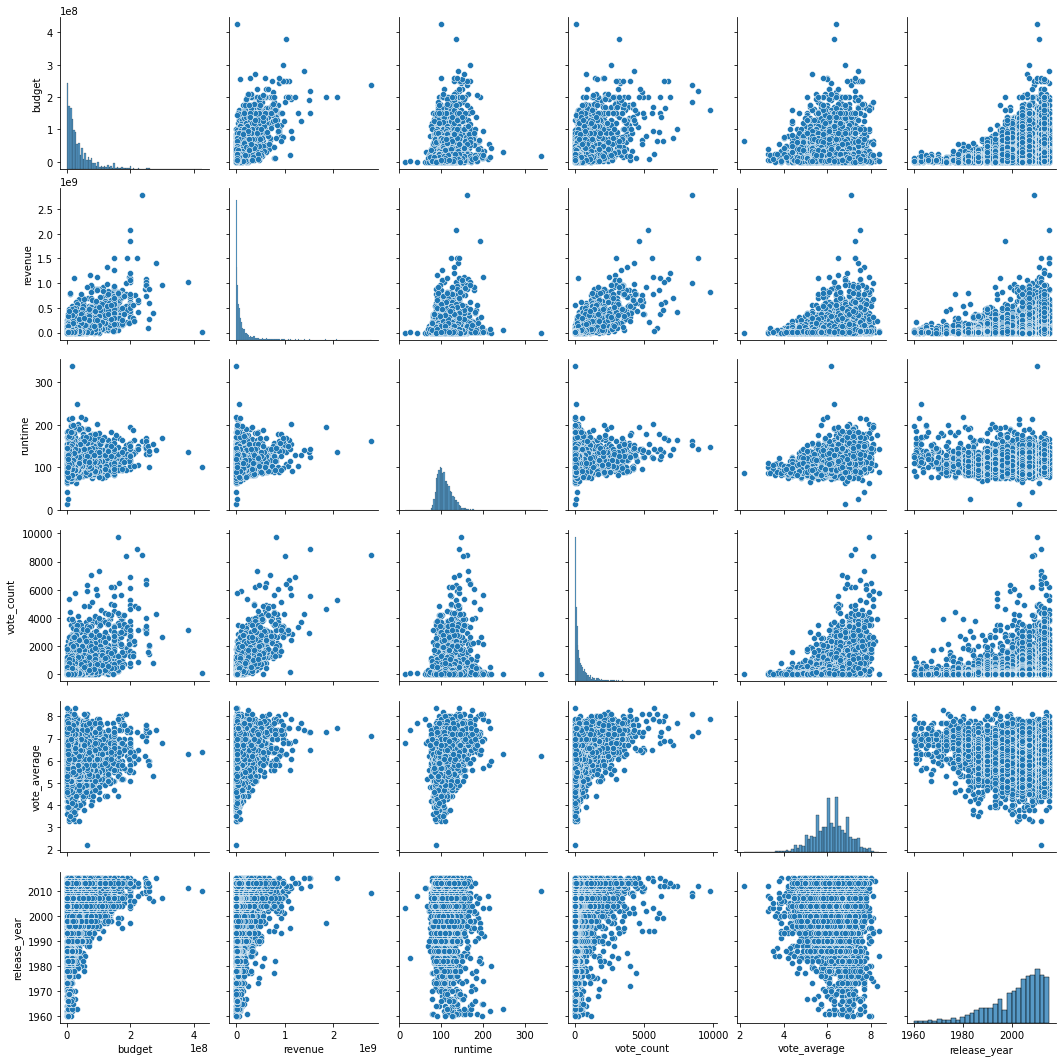

In [ ]:
sns.pairplot(df_movies)

### Research Question 1: Which genres are the most popular

Drama              1754
Comedy             1358
Thriller           1203
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              13
TV Movie              1
dtype: int64


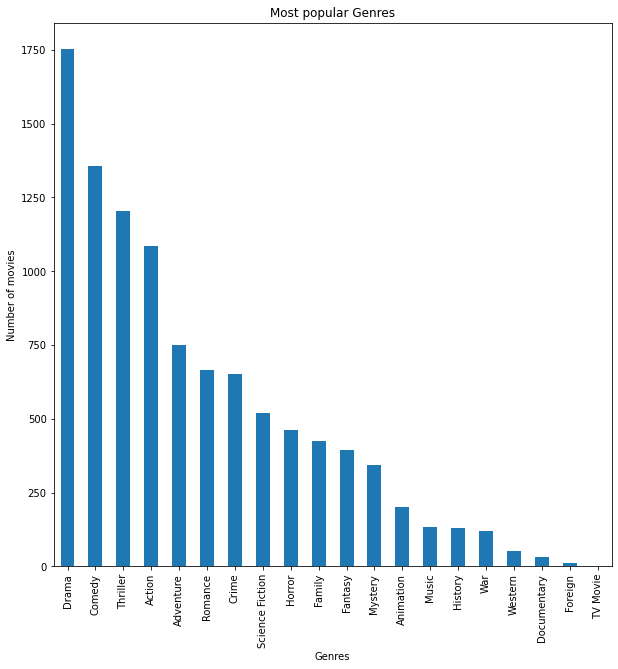

In [ ]:
# Which genres are the most popular
#To anser this, I HAVE TO SEPARATE THE GENRES THAT ARE COMBINED WITH THE | SYMBOL
genres_sep = pd.Series(df_movies['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
print(genres_sep)

#Then i will plot a bar chart to show the relationship between the genres and the rating
dig = genres_sep.plot(kind="bar", figsize=(10, 10))
# title
dig.set(title = 'Most popular Genres')
# x-axis label and y-axis label
dig.set_xlabel('Genres')
dig.set_ylabel('Number of movies')
# Show the plot
plt.show()

### Research Question 2 : what is the average budget of all movies

In [ ]:
df_movies['budget'].mean()

37240270.66597403

> The average budget of all movies in this dataset is 37,240,270 (37.240 million dollars)

### Research Question 3:  what is the average runtime of all movies

In [ ]:
df_movies['runtime'].mean()

109.22883116883116

> The average runtime of the movies in this dataset is 109.23 minutes

(array([3.000e+00, 3.900e+01, 2.356e+03, 1.263e+03, 1.490e+02, 3.400e+01,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 15. ,  47.3,  79.6, 111.9, 144.2, 176.5, 208.8, 241.1, 273.4,
        305.7, 338. ]),
 <a list of 10 Patch objects>)

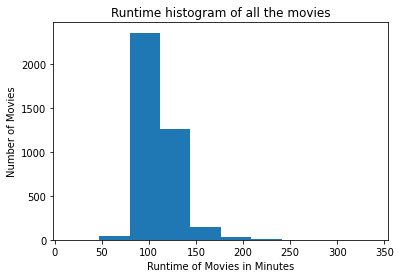

In [ ]:
#to visualise this:
# x-axis and y-axis labels
plt.xlabel('Runtime of Movies in Minutes')
plt.ylabel('Number of Movies')
# Title
plt.title('Runtime histogram of all the movies')
plt.hist(df_movies['runtime'], bins = 10)

### Research Question 4:  which movies generated the highest and lowest revenues and how do they rate 

In [ ]:
# the movie which generated the highest revenue
print (df_movies.loc[df_movies['revenue'].idxmax()])

# the the movie which generated the lowset revenue
df_movies.loc[df_movies['revenue'].idxmin()]

budget                                                  237000000.0
revenue                                                2781505847.0
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
vote_count                                                     8458
vote_average                                                    7.1
release_year                                                   2009
Name: 1386, dtype: object


budget                                                    6000000.0
revenue                                                         2.0
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
vote_count                                                       46
vote_average                                                    6.4
release_year                                                   2003
Name: 5067, dtype: object

>The movie with that generated the highest revenue is Avatar and it rated 7.1/10
while the movie that generated the lowest revenu is Shattered Glass and it rated 6.4/10

### Research Question 5:  what is the avarage budget needed to generate revenue of over 50million dollars 

In [ ]:
#first I have to filter the dataset to have only rows with revenue > 50 million dollars
df_50M = df_movies.query('revenue > 50000000')
df_50M.shape

(1832, 10)

In [ ]:
#find the mean of the budget of the new dataset
df_50M['budget'].mean()

58664579.77074236

> The average budget of the movies that generated revenues above 50mllion dollars is $58,664,579.7

### Research Question 6:  what is the average revenue generated by the movies that made over 50million dollars 

In [ ]:
#find the mean of the revenue of the new dataset
df_50M['revenue'].mean()

207087667.47925764

> The average revenue recorded by the movies that generated more than 50 million dollars is : $207,087,667.47

### Research Question 7:  what is the average runtime of the movies that made over 50million dollars 

In [ ]:
df_50M['runtime'].mean()

113.06331877729258

(array([  3.,   4.,   8.,  33.,  38.,  99., 129., 113., 170., 111., 159.,
        100., 143., 127.,  81., 109.,  69.,  79.,  57.,  38.,  37.,  19.,
         19.,  15.,  15.,  10.,   6.,   8.,   9.,   4.,   5.,   4.,   1.,
          2.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 69.  ,  72.58,  76.16,  79.74,  83.32,  86.9 ,  90.48,  94.06,
         97.64, 101.22, 104.8 , 108.38, 111.96, 115.54, 119.12, 122.7 ,
        126.28, 129.86, 133.44, 137.02, 140.6 , 144.18, 147.76, 151.34,
        154.92, 158.5 , 162.08, 165.66, 169.24, 172.82, 176.4 , 179.98,
        183.56, 187.14, 190.72, 194.3 , 197.88, 201.46, 205.04, 208.62,
        212.2 , 215.78, 219.36, 222.94, 226.52, 230.1 , 233.68, 237.26,
        240.84, 244.42, 248.  ]),
 <a list of 50 Patch objects>)

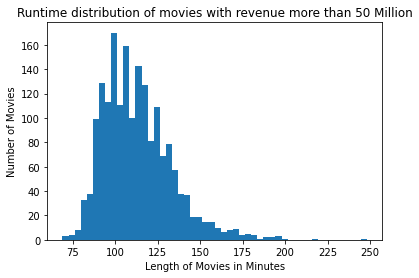

In [ ]:
# x-axis & y-axis, # Title of the histogram
plt.xlabel('Length of Movies in Minutes')
plt.ylabel('Number of Movies')
plt.title('Runtime distribution of movies with revenue more than 50 Million')
# Plot the chart
plt.hist(df_50M['runtime'], bins = 50)

> the avarage runtime of the movies that made over 50million dollars is: 113.1 minutes
and directly aabove is the distribution of the rutime of the movies in this set

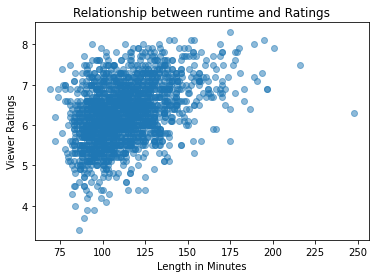

In [ ]:
#Then I check if there a relation between the Runtime and Viewers Ratings
plt.xlabel('Length in Minutes')
plt.ylabel('Viewer Ratings')
# Title of the histogram
plt.title('Relationship between runtime and Ratings')
plt.scatter(df_50M['runtime'], df_50M['vote_average'], alpha=0.5)
plt.show()

> Most of the Movies that made a Revenue above 50 Million have a runtme of 80-135 minutes. I will advise we work within this time frame

In [ ]:
#using the groupby function to see the mean
df_50M.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [ ]:
df_50M.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year
count,1.832000e+03,1.832000e+03,1832.000000,1832.000000,1832.000000,1832.000000
mean,5.866458e+07,2.070877e+08,113.063319,914.842795,6.301419,2002.692140
std,4.938694e+07,2.156585e+08,20.403851,1114.202742,0.737546,10.152157
min,1.130000e+02,5.000755e+07,69.000000,14.000000,3.400000,1960.000000
25%,2.500000e+07,8.113323e+07,98.000000,242.000000,5.800000,1998.000000
50%,4.500000e+07,1.316990e+08,110.000000,517.000000,6.300000,2005.000000
75%,8.000000e+07,2.430514e+08,124.000000,1104.250000,6.800000,2010.000000
max,3.800000e+08,2.781506e+09,248.000000,9767.000000,8.300000,2015.000000


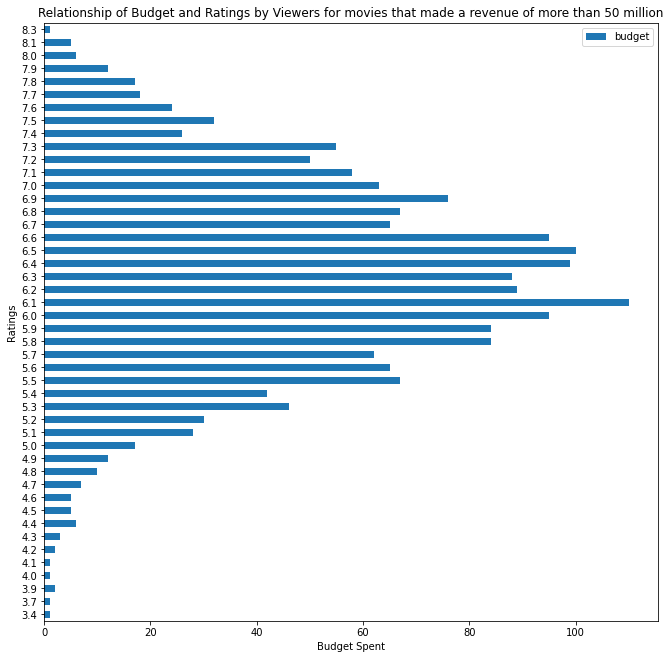

In [ ]:
# plot relationship between vote_average and budget for movies that made a revenue of more than 50Million
df_50M.groupby(['vote_average'],)['budget'].count().plot(kind='barh', figsize=(11, 11))
# title and labels
plt.ylabel('Ratings')
plt.xlabel('Budget Spent')
plt.title('Relationship of Budget and Ratings by Viewers for movies that made a revenue of more than 50 million')

# legend
plt.legend()

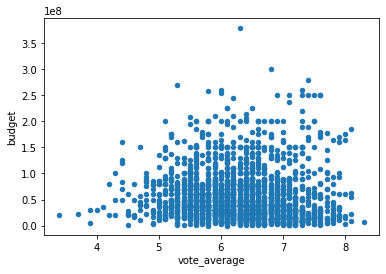

In [ ]:
df_50M.plot(x='vote_average', y= 'budget', kind = 'scatter');

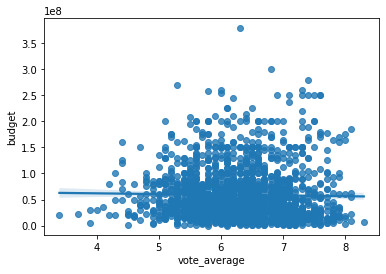

In [ ]:
#create a regression plot to see the corellation between the two columns
sns.regplot(x='vote_average', y= 'budget', data=df_50M);

In the Figures above, I explore the relatonship between the raings and budgets.does higher budget increase the chances of higher ratings? After visualization, I can see that investing more money into budgets does not affect the ratings of the movie positively and so other areas of improvement should be priotised over increasing the estimated budget originally invested.

In [ ]:
df_movies['revenue_range'] = pd.cut(x=df_movies['revenue'], bins=[0,50000000,100000000, 200000000, 300000000, 500000000, 1000000000, 5000000000, 10000000000,50000000000])
df_movies['revenue_range'].sample(4)

4399              (0, 50000000]
8023      (50000000, 100000000]
6971     (300000000, 500000000]
8243    (500000000, 1000000000]
Name: revenue_range, dtype: category
Categories (9, interval[int64, right]): [(0, 50000000] < (50000000, 100000000] <
                                         (100000000, 200000000] < (200000000, 300000000] < ... <
                                         (500000000, 1000000000] < (1000000000, 5000000000] <
                                         (5000000000, 10000000000] < (10000000000, 50000000000]]

In [ ]:
df_movies.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,revenue_range
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,"(1000000000, 5000000000]"
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,"(300000000, 500000000]"
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,"(200000000, 300000000]"
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,"(1000000000, 5000000000]"
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,"(1000000000, 5000000000]"


Below, I will check for another column that can increase our chances of making more revenue

In [ ]:
#I check for the top 15 most frequent cast in movies that made revenue of more than 50 Million
cast_split = pd.Series(df_50M['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_split.head(15)

Bruce Willis          32
Tom Cruise            30
Tom Hanks             28
Brad Pitt             27
Robert De Niro        27
Samuel L. Jackson     26
Eddie Murphy          26
Johnny Depp           25
Harrison Ford         25
Sylvester Stallone    24
Robin Williams        24
Cameron Diaz          24
Morgan Freeman        24
Denzel Washington     23
Matt Damon            23
dtype: int64

The top 15 casts we should try to get are above
Nexxt, I visualize this with a plot

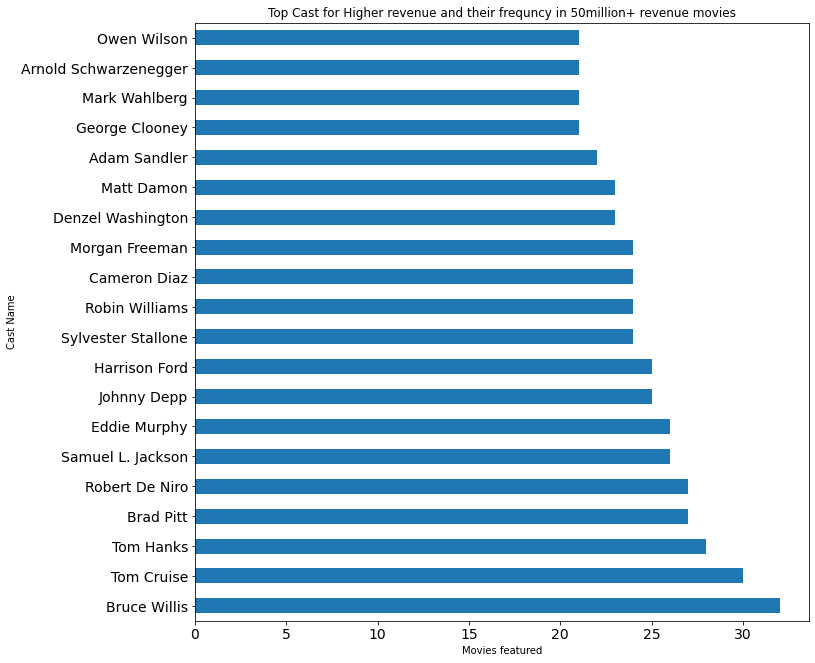

In [ ]:
# Initialize the plot
castdiag= cast_split.head(20).plot.barh(fontsize = 14, figsize=(11, 11))
# Set a title
castdiag.set(title = 'Top Cast for Higher revenue and their frequncy in 50million+ revenue movies')
# x-label and y-label
castdiag.set_xlabel('Movies featured')
castdiag.set_ylabel('Cast Name')
# Show the plot
plt.show()

AS shown in the visual above, the top 15 have proven to generate more revenue with thier casting.

<a id='conclusions'></a>
## Conclusions

TO increase our potential to generate REVENUE higher than $50M,
1.  The best  5 genres to invest in are: Drama, Comedy, Thriller, Action and Adventure.

2. The runtime of our movie should be around 80-135 minutes.
3. We should look to invest a budget of around $58,664,579.7

4. Our expected revenue should be around $207,087,667.47
5.  After more exploration and visualization, I can see that investing more money into budgets does not affect the ratings of the movie positively and so other areas of improvement should be priotised over increasing the estimated budget originally invested.
6. Rather than look to increase the budget, we can look to hire any 5 actors from the list below as part of our cast: This will increase the chances of our movie having better ratings than its contemporaries
  1. Bruce Willis          32
  2. Tom Cruise            30
  3. Tom Hanks             28
  4. Brad Pitt             27
  5. Robert De Niro        27
  6. Samuel L. Jackson     26
  7. Eddie Murphy          26
  8. Johnny Depp           25
  9. Harrison Ford         25
  10. Sylvester Stallone    24
  11. Robin Williams        24
  12. Cameron Diaz          24
  13. Morgan Freeman        24
  14. Denzel Washington     23
  15. Matt Damon            23


The movie that generated the highest revenue is Avatar with a budget of 237000000.0 and a revenue of 2781505847.0
original_title and a rating of 7.1

The movie that generated the lowest revenue is Shattered Glass with a budget of 6000000.0 and a revenue of 2.0
original_title and a rating of 6.4

##LIMITATIONS

The Original Data was altered for the purpose of this analysis in the sense that: some values for budget and revenues were not recorder so the rows were dropped. This has affeted my analysis.


A list of Web sites, books, forums, blog posts, github repositories, etc. that I referred to or used in creating your submission:
1. https://stackoverflow.com/
2. https://www.geeksforgeeks.org/
3. https://towardsdatascience.com/
4. https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata 

